## Proyecto portafolios de inversión

### Objetivo Proyecto
- Enseñarnos a tomar decisiones financieras correctas.
- Usar la programación para simular escenarios reales.
- Tomar decisiones adecuadas con los datos que nos refleja el problema.


## Problema

Para nuestro portafolio de inversiones tenemos un presupuesto de 100K para invertir, tras la seguridad de los bancos decidimos invertir en ellos, así que encontramos 5 de los mejores pocisionados y entre ellos elegimos a los que son más probables a que nos generen el doble de ganancia tras una serie de algoritmos. 
Los bancos elegidos fueron:
- Jp Morgan Chase & and Co
- Bank of America
- Citigroup INC
- Goldman Sachs
- Barclays


### Objetivos algoritmo
- Sacar el historico de los bancos seleccionados
- Evolucion de acciones 
- Sacar los rendimientos
- Simular el precio futuro de las acciones 
- Sacar la mejor fecha de venta para generar una ganancia 

In [43]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt

1. Vamos a crear una función con la que podamos llamar los datos de cualquier página web. En este caso será de Yahoo Finance.

In [44]:
def getCloses(names,start,end):
    datos = web.DataReader(names,'yahoo',start,end)
    return datos['Adj Close']

2. Llamamos los datos que queremos que son los de los bancos antes mencionados. (Obtendremos los precios al cierre)

In [45]:
names=['JPM','BAC','C','GS','BCS']
start='2019-11-10'
end='2020-11-10'
datos = getCloses(names,start,end) 
datos.head()

Symbols,JPM,BAC,C,GS,BCS
Date,,,,,
2019-11-11,125.367302,32.338242,72.667641,213.838898,8.464290
2019-11-12,124.633949,32.250526,72.158203,215.186218,8.473919
2019-11-13,123.977768,31.958136,71.043198,214.122040,8.387254
2019-11-14,124.093567,31.870422,70.975906,214.229431,8.406512
2019-11-15,124.990967,32.094585,71.514198,215.029999,8.454659


3. Para darnos una idea de la evolución de las acciones en el último año, gráficamos los precios.

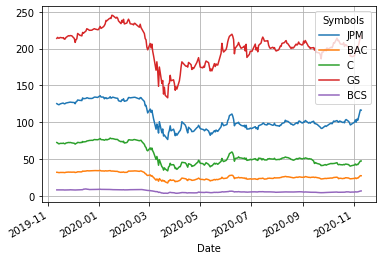

In [46]:
names = ['JPM','BAC','C','GS','BCS']
start = '2019-11-10'
end= '2020-11-10'
datos= getCloses(names,start,end)
datos.plot(grid=True)

4. Con la siguiente fórmula, sacamos los rendimientos y reflejamos en una tabla algunos datos estadisticos.

In [47]:
R=((datos-datos.shift())/datos.shift()).dropna()

In [48]:
R = datos.pct_change().dropna()
R.describe()

Symbols,JPM,BAC,C,GS,BCS
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.000279,0.000042,-0.000796,0.000593,0.000087
std,0.033889,0.036541,0.041789,0.032510,0.040223
min,-0.149649,-0.153974,-0.192986,-0.127053,-0.218519
25%,-0.013476,-0.015748,-0.017447,-0.012269,-0.016794
50%,0.000073,0.001356,-0.001173,-0.000278,-0.000542
75%,0.013207,0.014259,0.014811,0.013763,0.013699
max,0.180125,0.177962,0.179843,0.175803,0.188256


5. Creamos una función que nos permite simular el precio futuro de una acción.

In [69]:
def simP(dato,start,ndays,N):
    R=dato.pct_change()
    mu=R.mean()
    std=R.std()
    Rsimulada=np.random.normal(mu,std,(ndays,N))
    fecha=pd.date_range(start,periods=ndays)
    RsimDF=pd.DataFrame(index=fecha, data = Rsimulada)
    Pproyectados=dato[-1]*(RsimDF+1).cumprod()
    return Pproyectados

Un inversionista compró acciones de 5 bancos diferentes y debido a la volatilidad causada por el coronavirus, quiere prevenir perdidas muy grandes. El se tiene establecido una regla de que al momento de perder el 10% de su valor, vender las acciones, por lo cual, como es un inversionista inseguro, al momento en el que la probabilidad de que esto ocurra sea del 60%, va a vender las acciones. 

6. Creamos una función que nos permita saber que días es probable tomar una decisión de venta.

In [171]:
def DíadeVenta(Proba):
    for i in range(365):
        if Proba[i] >= .70:
            print("Muy probable que  este día pierdas el 10% de su valor. Vende.", Prob.index[i])
        else:
            print("Sigues dentro de tu limite")  

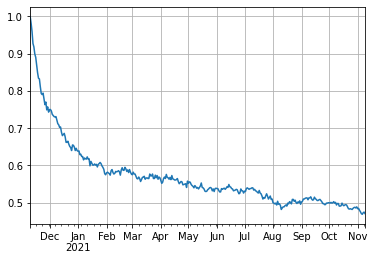

In [172]:
Psim=simP(datos['JPM'],'2020-11-10',365,1000)
Umbral=datos['JPM'][-1]*.90
B=Psim>Umbral
Prob=B.mean(axis=1)
Prob.plot(grid=True)

In [173]:
DíadeVenta(Prob)

Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-10 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-11 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-12 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-13 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-14 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-15 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-16 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-17 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-18 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-19 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-20 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-21 00:00:00
Muy probable que

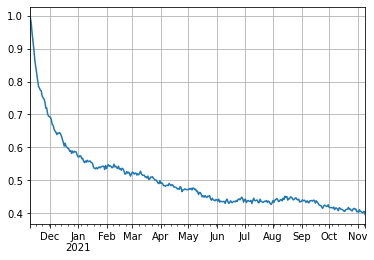

In [153]:
Psim=simP(datos['BAC'],'2020-11-10',365,1000)
Umbral=datos['BAC'][-1]*.90
B=Psim>Umbral
Prob=B.mean(axis=1)
Prob.plot(grid=True)

In [178]:
DíadeVenta(Prob)

Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-10 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-11 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-12 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-13 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-14 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-15 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-16 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-17 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-18 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-19 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-20 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-21 00:00:00
Muy probable que

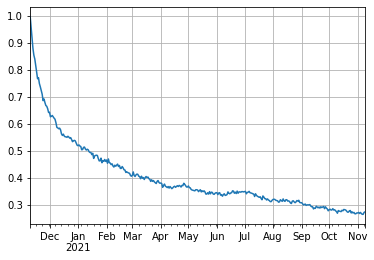

In [174]:
Psim=simP(datos['C'],'2020-11-10',365,1000)
Umbral=datos['C'][-1]*.90
B=Psim>Umbral
Prob=B.mean(axis=1)
Prob.plot(grid=True)

In [175]:
DíadeVenta(Prob)

Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-10 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-11 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-12 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-13 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-14 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-15 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-16 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-17 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-18 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-19 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-20 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-21 00:00:00
Muy probable que

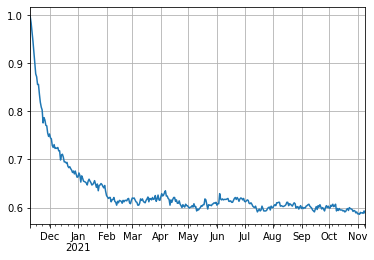

In [156]:
Psim=simP(datos['GS'],'2020-11-10',365,1000)
Umbral=datos['GS'][-1]*.90
B=Psim>Umbral
Prob=B.mean(axis=1)
Prob.plot(grid=True)

In [176]:
DíadeVenta(Prob)

Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-10 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-11 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-12 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-13 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-14 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-15 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-16 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-17 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-18 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-19 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-20 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-21 00:00:00
Muy probable que

2020-11-10    0.998
2020-11-11    0.959
2020-11-12    0.924
2020-11-13    0.899
2020-11-14    0.862
              ...  
2021-11-05    0.409
2021-11-06    0.408
2021-11-07    0.407
2021-11-08    0.410
2021-11-09    0.410
Freq: D, Length: 365, dtype: float64

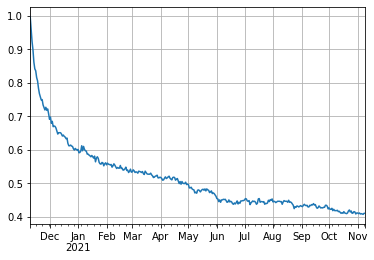

In [157]:
Psim=simP(datos['BCS'],'2020-11-10',365,1000)
Umbral=datos['BCS'][-1]*.90
B=Psim>Umbral
Prob=B.mean(axis=1)
Prob.plot(grid=True)
Prob

In [177]:
DíadeVenta(Prob)

Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-10 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-11 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-12 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-13 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-14 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-15 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-16 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-17 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-18 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-19 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-20 00:00:00
Muy probable que  este día pierdas el 10% de su valor. Vende. 2020-11-21 00:00:00
Muy probable que

Lo que buscamos resolver en este problema fue la excatitud. El hecho de que el programa diga que días es factible vender, es muy importante para la toma de decisiones al momento de querer ser precisos y en este caso, más que máximizar las ganancias, es minimizar el riesgo. Como podemos ver, a la larga podemos mantener las acciones, que en estos momentos de incertidumbre por el covid, sería muy bueno mantener posiciones estables y no tener pérdidas. Claro, por ahí se puede salir alguna buena ganancia o una mala pérdida. El portafolio de inversión esta armado al gusto y analisis del inversor y se busca que con las predicciones, el portafolio este en constante movimiento con entradas y salidas de activos.

## Conclusión

El algoritmo nos conduce a una solución factible y nos simplificó la toma de decisión en base a las acciones compradas. ¿Por qué? Debido a las altas fluctuaciones de este mercado, decidimos mantener un portafolio que a un año, mantenga estabilidad en su precio. Se cumplieron los objetivos debido a que pudimos acertar con el manejo del portafolio y la extensión de una nueva función a lo ya antes visto.